In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
  PATH = 'drive/My Drive/Dataset/Drive/training/'
  os.listdir(PATH)

['1st_manual',
 'mask',
 '1st_manual_tif',
 'mask_jpg',
 'images',
 'RGB-contour',
 'RGB-mask',
 'Slice- 1st_manual',
 'Slice- images']

In [ ]:
orig_images=glob.glob(os.path.join(PATH,'images','*.tiff'))
len(orig_images)

0

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }


In [ ]:
for i in os.listdir('drive/My Drive/Dataset/STARE/images'): 
    image = cv2.imread("drive/My Drive/Dataset/STARE/images/"+ i) 
  
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # red color boundaries [B, G, R]
    lower = [np.mean(image[:,:,i] - np.std(image[:,:,i])/3 ) for i in range(3)]
    upper = [250, 250, 250]

    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # find the colors within the specified boundaries and apply
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask=mask)

    ret,thresh = cv2.threshold(mask, 40, 255, 0)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


    if len(contours) != 0:
        # draw in blue the contours that were founded
        cv2.drawContours(output, contours, -1, 255, 3)

        # find the biggest countour (c) by the area
        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)

        # draw the biggest contour (c) in green
        cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)

    foreground = image[y:y+h,x:x+w]
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1),plt.imshow(image),plt.title("Input",fontdict=font)
    plt.subplot(1,3,2),plt.imshow(output),plt.title("All Contours",fontdict=font)
    plt.subplot(1,3,3),plt.imshow(foreground),plt.title("output",fontdict=font)
    print(foreground.shape)
    plt.show()

    cv2.imwrite("drive/My Drive/Dataset/STARE/RGB-contour/" +i, foreground)

Output hidden; open in https://colab.research.google.com to view.

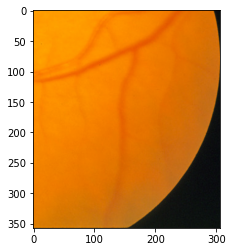

In [ ]:
plt.imshow(foreground)

In [ ]:
foreground.shape

(532, 535, 3)

In [ ]:
def get_data(path, resize_dim=512):
    img=cv2.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [ ]:
foreground=np.array([get_data(path) for path in orig_images])
foreground.shape

(20, 512, 512)